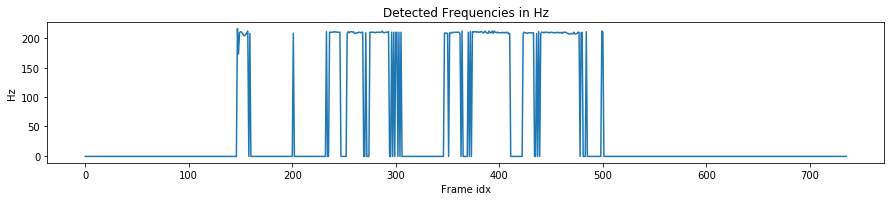

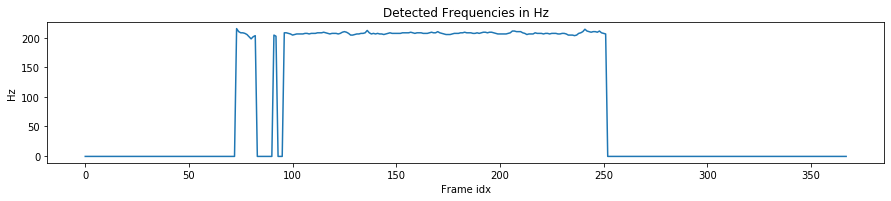

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft

'''
Question:
1. The autocorrelation for speech signals will be periodic with many candidate peaks. 
    How do you decide which peak to use?
2. The autocorrelation for any signal will be maximal in the neighborhood surrounding zero lag. 
    How do you decide what to ignore?
3. Why did we choose 40 ms frames?

1.  We ignore R[0] which owns the max value with lag = 0
    Defining an offset of lag called k, and find max(R[l]) in the range of (k,fs/2)
2.  Since the autocorrelation will have a decreasing ampitude as the lag increases, 
    we can ignore the first peak (R[0]) and choose the second max peak. 
    The lag between first and the second max peak indicates that the frame is moved 
    for a period.
3.  For speech analysis, it is preferable to choose a frame between 20ms to 40ms. 
    The frame of this size usually contains a phone of human speech. 
    For pitch detection, a frame with 40ms length can also efficiently observe the 
    change in real time. 

'''


################## YOUR CODE HERE ######################

En = []
def isVoiced(frame):
    isV = 0
    Energy = 0
    for x in frame:
        Energy += pow(x,2)
    En.append(Energy/100000000)
    if En[-1] > 30:
        isV = 1
    else:
        pass
    return isV

def Fq(Rxx, N):
    peaks = []
    (max_val,l) = (0,0)
    
    k = 200
    
    max_val = Rxx[k]
    
    for i in range(k, int(N/2)):  # Due to symmetric, we only look for the first half 
        if Rxx[i] > max_val:
            l = i    # lag
            max_val = Rxx[i]   # max_value of Rxx
    if l == 0:
        l = k
    #print("max_val and l is ", max_val, l)
    peaks = np.array(peaks)
    return max_val, l, k

def ece420ProcessFrame(frame, Fs):
    N = len(frame)
    if not(isVoiced(frame)):
        freq = -1
        return freq
    X = np.fft.fft(np.fft.fftshift(frame))
    X_c = np.conj(X)
    Rxx = np.fft.ifft(X*X_c)
    max_val, lag, offset = Fq(abs(Rxx), N)
    if lag == 0:
        return -1
    freq =  Fs/lag  
    return freq

################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')
#-------------------------------------------------------#
FRAME_SIZE = 512
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)

plt.figure(figsize = (15,15))
plt.subplot(511)
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz')
plt.show()
#-------------------------------------------------------#
FRAME_SIZE = 1024
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)

plt.figure(figsize = (15,15))
plt.subplot(512)
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz')
plt.show()



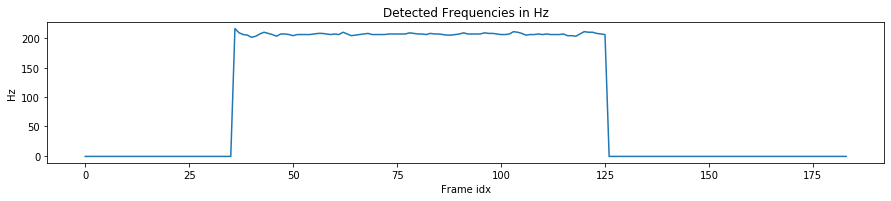

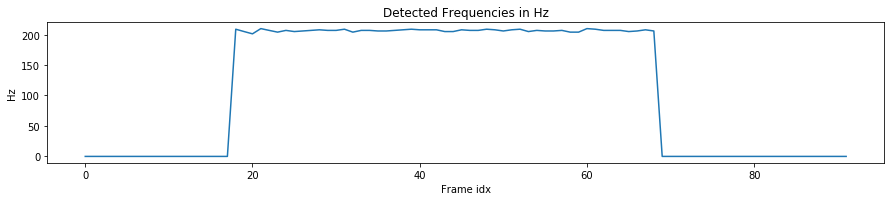

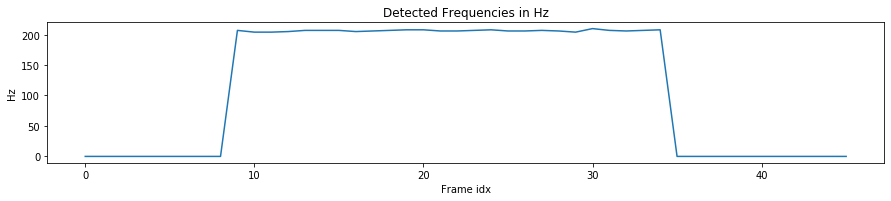

In [31]:
#-------------------------------------------------------#
FRAME_SIZE = 2048
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)

plt.figure(figsize = (15,15))
plt.subplot(513)
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz')
plt.show()

#-------------------------------------------------------#
FRAME_SIZE = 4096
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)

plt.figure(figsize = (15,15))
plt.subplot(514)
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz')
plt.show()

#-------------------------------------------------------#
FRAME_SIZE = 8192
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ece420ProcessFrame(frame.astype(float), Fs)

plt.figure(figsize = (15,15))
plt.subplot(515)
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frame idx')
plt.ylabel('Hz')
plt.title('Detected Frequencies in Hz')
plt.show()
